In [87]:
# https://github.com/e9t/nsmc

In [88]:
import io
import numpy
import matplotlib.pyplot as plt
import numpy as np
import re
import math
import pandas as pd
%matplotlib inline

In [89]:
special_chars_remover = re.compile("[^\w'|_]")

def remove_special_characters(sentence):
    return special_chars_remover.sub(' ', sentence)

In [90]:
def read_data():
    data = pd.read_csv('ratings_train.txt', sep='\t', encoding='utf-8')
    data_positive = data[data["label"] == 0]
    data_negative = data[data["label"] == 1]
    
    training_sentences = [data_positive["document"], data_negative["document"]]
    return [' '.join(map(str,training_sentences[0])), ' '.join(map(str,training_sentences[1]))]

In [91]:
def create_BOW(sentence):
    bow = {}
    splitted_sentence = remove_special_characters(sentence.lower()).split()
    tokens = [token for token in splitted_sentence if len(token) >= 1]
    
    for token in tokens:
        if token not in bow:
            bow[token] = 1
        else:
            bow[token] += 1
    return bow

In [92]:
def calculate_doc_prob(training_sentence, testing_sentence, alpha):
    logprob = 0

    training_model = create_BOW(training_sentence)
    testing_model = create_BOW(testing_sentence)
    
    total_training_model_value = sum(training_model.values())
    
    for key in testing_model:
        if key in training_model:
            logprob += math.log((training_model[key] / total_training_model_value) ** testing_model[key])
        else:
            logprob += math.log(alpha / total_training_model_value)        
    return logprob

In [93]:
def normalize_log_prob(prob1, prob2):
    maxprob = max(prob1, prob2)

    prob1 -= maxprob
    prob2 -= maxprob
    prob1 = math.exp(prob1)
    prob2 = math.exp(prob2)

    normalize_constant = 1.0 / float(prob1 + prob2)
    prob1 *= normalize_constant
    prob2 *= normalize_constant

    return (prob1, prob2)

In [94]:
def naive_bayes(training_sentences, testing_sentence):
    log_prob_negative = calculate_doc_prob(training_sentences[0], testing_sentence, 0.1) + math.log(0.5)
    log_prob_positive = calculate_doc_prob(training_sentences[1], testing_sentence, 0.1) + math.log(0.5)
    prob_pair = normalize_log_prob(log_prob_negative, log_prob_positive)
    
    return prob_pair

In [95]:
def visualize_boxplot(title, values, labels):
    width = .35

    print(title)
    
    fig, ax = plt.subplots()
    ind = numpy.arange(len(values))
    rects = ax.bar(ind, values, width)
    ax.bar(ind, values, width=width)
    ax.set_xticks(ind + width/2)
    ax.set_xticklabels(labels)

    def autolabel(rects):
        # attach some text labels
        for rect in rects:
            height = rect.get_height()
            ax.text(rect.get_x()+rect.get_width()/2., height + 0.01, '%.2lf%%' % (height * 100), ha='center', va='bottom')

    autolabel(rects)

    plt.show()

어설픈 연기들로 몰입이 전혀 안되네요


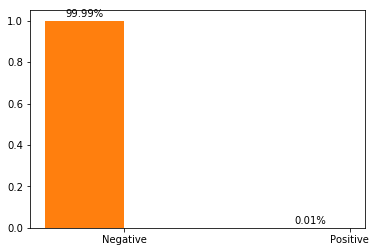

In [96]:
training_sentences = read_data()
testing_sentence = "어설픈 연기들로 몰입이 전혀 안되네요"
prob_pair = naive_bayes(training_sentences, testing_sentence)

plot_title = testing_sentence
if len(plot_title) > 50: plot_title = plot_title[:50] + "..."
visualize_boxplot(plot_title,
              list(prob_pair),
              ['Negative', 'Positive'])